# Task 3

Repeat Task 2 on a subset of the CIFAR 10 dataset (Download the ‘cifar-data-subset’ and ‘cifar-label-names’ files from Blackboard) 

In [2]:
# Use the following method to load the two files
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

1)	Load the CIFAR-10 dataset from the two files using the above method

In [3]:
cifar = unpickle('cifar10/cifar-data-subset')

In [ ]:
# View the unpickled dictionary
cifar 

# We are concerned with the 'data' and 'labels' keys

In [4]:
labels = unpickle('cifar10/cifar-label-names')

In [ ]:
# View the unpickled dictionary
labels

# We get the category names from the 'label_names' key

In [5]:
data = cifar['data']
target = cifar['labels']

# Target is a list, convert it into numpy array
import numpy as np
target = np.array(target)

label_names = labels['label_names']

In [6]:
# You can replace 10000 with 1000 if you want to run the program and view some results quickly
data = data[:1000,:]
data.shape

(1000, 3072)

In [7]:
# You can replace 10000 with 1000 if you want to run the program and view some results quickly
target = target[:1000]
target.shape

(1000,)

2) Shuffle the dataset

In [8]:
from sklearn.utils import shuffle
data, target = shuffle(data, target)

3)	Split the train and test sets at 85:15

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=0)

4)	Create a kNN classifier and perform 5-fold cross validation for each different values of 'k' (k = 3,5,…,25,27,29) 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_list = list(range(3,30,2))

cross_val_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,p=1) # Try p=2 for Euclidean distance
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    print(str(k) + ': ' + str(scores)) # View progress
    cross_val_scores.append(scores.mean())

3: [ 0.25714286  0.24137931  0.26470588  0.22289157  0.21818182]
5: [ 0.23428571  0.24137931  0.26470588  0.25301205  0.24848485]
7: [ 0.25142857  0.23563218  0.24705882  0.24698795  0.24242424]
9: [ 0.26285714  0.27586207  0.23529412  0.25903614  0.24242424]
11: [ 0.24571429  0.28735632  0.24117647  0.24698795  0.24848485]
13: [ 0.25142857  0.29310345  0.24117647  0.25903614  0.25454545]
15: [ 0.25714286  0.27586207  0.23529412  0.27710843  0.26666667]
17: [ 0.26285714  0.29310345  0.24117647  0.29518072  0.24242424]
19: [ 0.25142857  0.25862069  0.22352941  0.28915663  0.24242424]
21: [ 0.24        0.27011494  0.24705882  0.28313253  0.23636364]
23: [ 0.25142857  0.27011494  0.22352941  0.26506024  0.24848485]
25: [ 0.25142857  0.27586207  0.22352941  0.25903614  0.24848485]
27: [ 0.25714286  0.27011494  0.23529412  0.25903614  0.24848485]
29: [ 0.26285714  0.29310345  0.22941176  0.24698795  0.26060606]


5)	Plot the accuracy score for each ‘k’ and find the optimum ‘k’ value

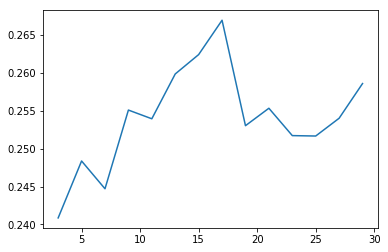

In [11]:
from matplotlib import pyplot as plt
plt.plot(k_list,cross_val_scores)
plt.show()

In [12]:
opt_index = cross_val_scores.index(max(cross_val_scores))
opt_k = k_list[opt_index]
opt_k

17

6)	Use the ‘k’ value obtained above and test the classifier on the test set

In [13]:
knn = KNeighborsClassifier(n_neighbors=opt_k,p=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

7)	Produce the classification report and visualise a few random results

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.42      0.71      0.53        14
          1       0.00      0.00      0.00        18
          2       0.21      0.38      0.27        16
          3       0.50      0.06      0.11        16
          4       0.14      0.42      0.21        12
          5       0.00      0.00      0.00        13
          6       0.26      0.43      0.32        14
          7       0.00      0.00      0.00        14
          8       0.35      0.65      0.46        17
          9       0.00      0.00      0.00        16

avg / total       0.19      0.26      0.19       150



/home/sriram/miniconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


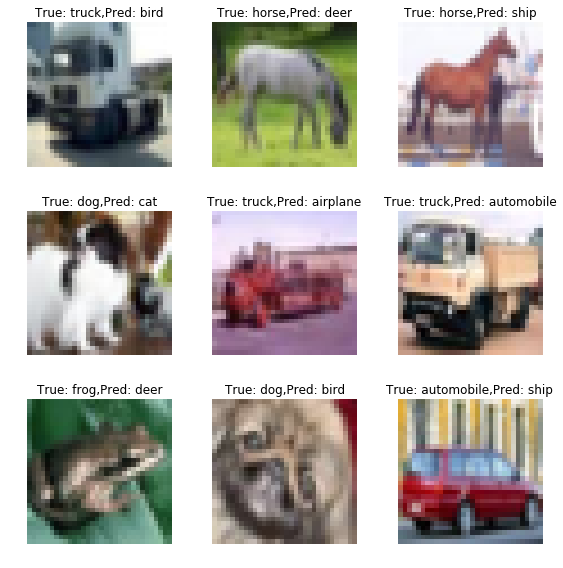

In [20]:
# Comparing the true and predicted results of a few samples
from skimage.io import imshow
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

n = 11 # Change the sample number 'n' here to view different sets of samples
if n>x_test.shape[0]-10: # bound the sample numbers to 9 less than the number of test samples
    n = x_test.shape[0]-10

for i in range(0,9):
    # Use the 'label_names' list to display the subplot titles
    ax = fig.add_subplot(3,3,i+1, title='True: ' + label_names[y_test[n+i]] + ',Pred: ' + label_names[y_pred[n+i]])
    # Reshape to (3,32,32) and transpose the variable with (1,2,0) to change it to (32,32,3)
    img = x_test[n+i,:].reshape((3,32,32)).transpose(1,2,0).astype('uint8');
    imshow(img)
    ax.axis('off')

plt.show()

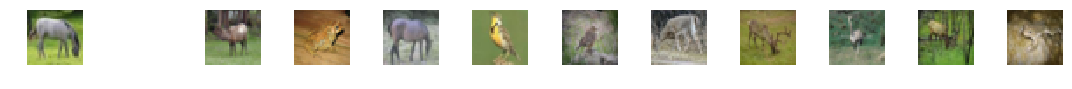

In [21]:
# Visualising the k-Nearest Neighbours of a sample

n = 12 # Change the sample number here to view different samples
if n>x_test.shape[0]-1: # bound the sample number 'n' by the number of test samples
    n = x_test.shape[0]-1

ind = knn.kneighbors(x_test[n,:].reshape(1,-1),n_neighbors=10,return_distance=False)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
start = 3
ax = fig.add_subplot(1,len(ind[0])+2,1)
img = x_test[n,:].reshape((3,32,32)).transpose(1,2,0).astype('uint8');
imshow(img)
ax.axis('off')
for i in ind[0]:
    ax = fig.add_subplot(1,len(ind[0])+2,start)
    img = x_train[i,:].reshape((3,32,32)).transpose(1,2,0).astype('uint8');
    imshow(img)
    ax.axis('off')
    start = start+1
#plt.tight_layout()
plt.show()